In [1]:
import networkx
import gensim
import matplotlib.pyplot as plt
from gensim.models import word2vec
from networkx.algorithms import community
import pprint

In [2]:
#Снимите комментарий с кода ниже, чтобы скачать модель word2vec
#или поместите в папку с файлом свою модель с названием
#ruscorpora_mystem_cbow_300_2_2015.bin.gz

#import urllib
#urllib.request.urlretrieve("http://rusvectores.org/static/models/"
#                "rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz",
#                "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

In [3]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [4]:
start_words = ['стол_S', 'стул_S', 'тумбочка_S']
w_graph = networkx.Graph()

In [5]:
def find_and_filter(s_word):
    words = []
    for sim_word in model.most_similar(positive=s_word, topn=281776):
        if sim_word[1] >= 0.5 and sim_word[0].endswith('_S'):
            words.append(sim_word)
        else:
            return words
def add_to_graph(s_word, words, w_graph):
    for word in words:
        w_graph.add_edge(s_word.split('_')[0], word[0].split('_')[0])
    return w_graph
def go_through_words(start_words, w_graph):
    all_words = []
    for s_word in start_words:
        words = find_and_filter(s_word)
        w_graph = add_to_graph(s_word, words, w_graph)
        all_words.extend([w[0] for w in words])
    return w_graph, all_words
def prepare_nodes(graph, groups, d_sen_dict):
    g_num = 0
    colors = ['red', 'yellow', 'orange', 'green', 'violet']
    for group in groups:
        for word in group:
            yield word, colors[g_num], d_sen_dict[word]
        g_num += 1

In [6]:
w_graph, all_words = go_through_words(start_words, w_graph)
w_graph, all_words = go_through_words(all_words, w_graph)

In [7]:
#Центральные узлы графа по degree centrality

d_cen_dict = networkx.degree_centrality(w_graph)
d_cen = sorted(list(d_cen_dict.items()), key=lambda val: val[1], reverse=True)
[w[0] for w in d_cen[0:3]]

['кровать', 'чемодан', 'диван']

In [8]:
#Центральные узлы графа по betweenness centrality

b_cen_dict = networkx.betweenness_centrality(w_graph)
b_cen = sorted(list(b_cen_dict.items()), key=lambda val: val[1], reverse=True)
[w[0] for w in b_cen[0:3]]

['тумбочка', 'чемодан', 'кровать']

In [9]:
#Центральные узлы графа по closeness centrality

c_cen_dict = networkx.closeness_centrality(w_graph)
c_cen = sorted(list(c_cen_dict.items()), key=lambda val: val[1], reverse=True)
[w[0] for w in c_cen[0:3]]

['тумбочка', 'кровать', 'сундук']

In [10]:
#Центральные узлы графа по eigencentrality

e_cen_dict = networkx.eigenvector_centrality(w_graph)
e_cen = sorted(list(e_cen_dict.items()), key=lambda val: val[1], reverse=True)
[w[0] for w in e_cen[0:3]]

['кровать', 'диван', 'тахта']

In [11]:
#Плотность графа

networkx.density(w_graph)

0.04041230366492147

In [12]:
#Радиус графа

networkx.radius(w_graph)

3

In [13]:
#Диаметр графа

networkx.diameter(w_graph)

5

In [14]:
#Коэффициент ассортативности графа

networkx.degree_pearson_correlation_coefficient(w_graph)

-0.3284016365580782

In [15]:
#Сообщества

communities = community.greedy_modularity_communities(w_graph)
pprint.pprint(communities, compact=True)

[frozenset({'авоська', 'багажник', 'бардачок', 'баул', 'баульчик', 'бочка',
            'бочонок', 'бумажник', 'бутыль', 'бювар', 'ваза', 'вещмешок',
            'жестянка', 'зеркало', 'карман', 'картонка', 'картоночка', 'кейс',
            'киот', 'кладовка', 'комод', 'конвертик', 'контейнер', 'корзина',
            'корзинка', 'короб', 'коробка', 'коробочка', 'котомка', 'кофр',
            'кошелек', 'кошелка', 'ларец', 'мебель', 'мешок', 'мешочек',
            'микроволновка', 'морозилка', 'морозильник', 'несессер', 'носилки',
            'папка', 'подзеркальник', 'подсвечник', 'пожитки', 'поклажа',
            'полка', 'полочка', 'портмоне', 'портплед', 'портфель',
            'портфельчик', 'поставец', 'ранец', 'ридикюль', 'рундук', 'рюкзак',
            'рюкзачок', 'саквояж', 'саквояжик', 'сверток', 'сейф', 'секретер',
            'сервант', 'стеллаж', 'сумка', 'сумочка', 'сундук', 'сундучок',
            'трюмо', 'тумбочка', 'тюк', 'футляр', 'холодильник', 'чемодан',
           

Было выделено 5 сообществ. Чтобы называть их, мы будем использовать их порядковые номера в выдаче выше.
Объекты трёх наиболее многочисленных сообществ объединены своей общей функцией: в первом сообществе все объекты являются различными вместилищами, во втором — поверхностями, на которых должно что-либо располагаться, в третьем объекты сами служат для того, чтобы что-то покрывать. Пятая группа объединена как части одного и того же целого (автомобиля). Элементы пятой группы попали в граф как, семантически близкие слову "сидение" (которое само по себе относится также ко второй группе). Вся четвёртая группа представляет собой слова, семантически близкие к слову "стопка". Эта группа оказывается большой из-за омонимичности этого слова: в сообщество попали и различные сосуды, и наборы плоских вещей, поставленных друг на друга.
Таким образом, сообщества с наибольшим числом элементов (с большим количеством связей) выделяются на основании общности функции входящих в них объектов, а немногочисленные сообщества (в нашем случае один объект в них связан со всеми остальными и других связей нет) могут быть выделены по другим признакам.

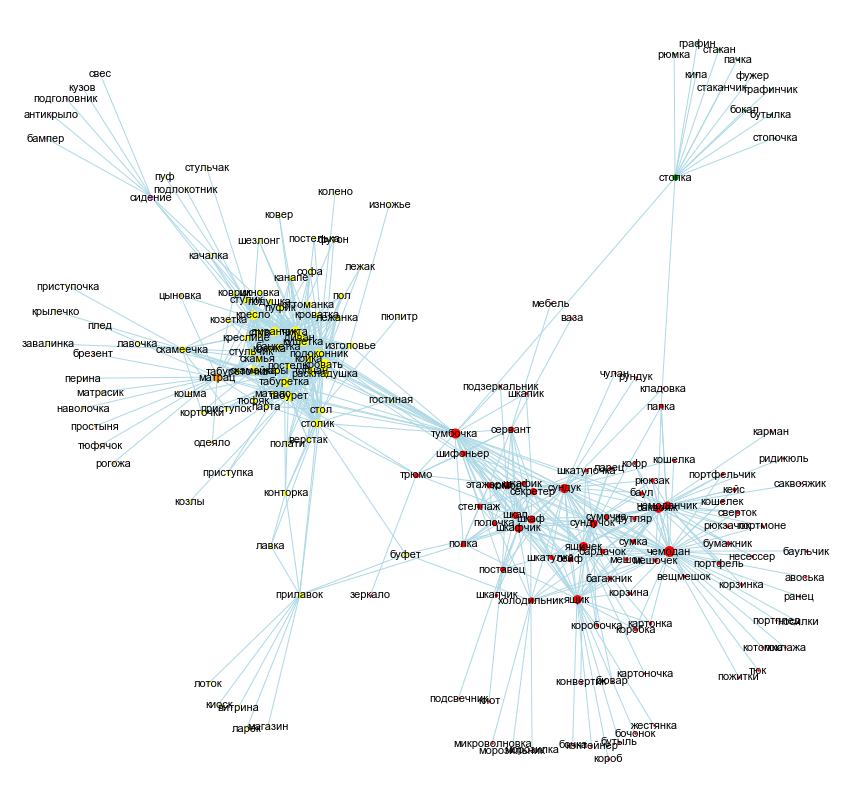

In [16]:
#Цвета вершин соответствуют кластеру слов, к которому они относятся.
#Размер соответствует центральности по degree centrality. 

plt.figure(3,figsize=(15,14.5)) 
pos = networkx.spring_layout(w_graph)
for word, color, cen in prepare_nodes(w_graph, communities, d_cen_dict):
    networkx.draw_networkx_nodes(w_graph, pos,
                       nodelist=[word],
                       node_color=color,
                       node_size=cen*400)
networkx.draw_networkx_edges(w_graph, pos, edge_color='lightblue')
networkx.draw_networkx_labels(w_graph, pos,
                              font_size=11,font_family='Arial')
plt.axis('off') 
plt.show() 